In [ ]:
#Santiago Lopez
#A01643411

In [1]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)
# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')
    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"
    # Define path del proyecto
    Ruta = '/content/drive/My Drive/NotebooksProfessorMio/'
else:
    # Define path del proyecto
    Ruta            = ""
# Import the packages that we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset url
url = "datasets/iris.csv"
# Load the dataset
df = pd.read_csv(Ruta + url)

Mounted at /content/drive


In [2]:
# prompt: show me the data

#Esto nomas enseña la data
df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# prompt: Drop rows with missing values

# Aqui quitamos donde habian nan aunque no se si quito el column completo en vez de row
df = df.dropna()
df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# Encoding the categorical column


#Esto es para convertir cualquier string a int


#Visualize the dataset

# Import LabelEncoder for encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Visualize the dataset after encoding
print("\nDataset after encoding the categorical columns:")
print(df.head(100))

# Basic Visualizations (simplified)

# 1. Histogram of all numeric columns, including encoded ones
#df.hist(bins=15, figsize=(12, 8), edgecolor='black')
#plt.suptitle('Histograms of Encoded Variables', size=16)
#plt.show()

# 2. Correlation heatmap
#plt.figure(figsize=(8, 6))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Correlation Heatmap')
#plt.show()

Categorical columns: Index([], dtype='object')

Dataset after encoding the categorical columns:
    sepal.length  sepal.width  petal.length  petal.width  variety
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
..           ...          ...           ...          ...      ...
95           5.7          3.0           4.2          1.2        1
96           5.7          2.9           4.2          1.3        1
97           6.2          2.9           4.3          1.3        1
98           5.1          2.5           3.0          1.1        1
99           5.7          2.8           4.1          1.3        1

[100 rows x 5 columns]


In [ ]:
# # Drop out non necesary columns
#df.drop(['ID', 'Gender', 'Glasses', 'Complete'], axis='columns', inplace=True)

#Pues en este caso pues si sirven todas depende de que datos quieras usar

#Aqui quitamos todo lo que no nos serviría


# Visualize the dataset
print(df.head())

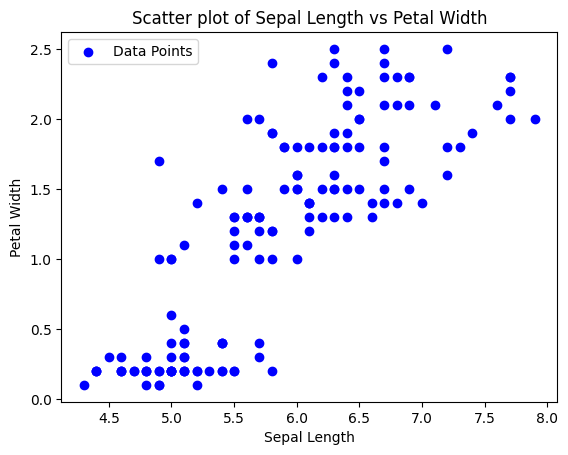

In [9]:
plt.scatter(df['sepal.length'], df['petal.width'], c='blue', label='Data Points')

# Adding labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Sepal Length vs Petal Width')



# Show the plot
plt.legend()
plt.show()

In [16]:
# Group the data by species (which contains the real clusters)
real_clusters = df.groupby('variety')

# Get dataframes for each species (real cluster)
cluster_setosa = real_clusters.get_group(0)
cluster_versicolor = real_clusters.get_group(1)
cluster_virginica = real_clusters.get_group(2)

# Print the first few rows of each cluster
print("Setosa Cluster (0):")
print(cluster_setosa.head())

print("\nVersicolor Cluster (1):")
print(cluster_versicolor.head())

print("\nVirginica Cluster (2):")
print(cluster_virginica.head())



Setosa Cluster (0):
   sepal.length  sepal.width  petal.length  petal.width  variety
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

Versicolor Cluster (1):
    sepal.length  sepal.width  petal.length  petal.width  variety
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1

Virginica Cluster (2):
     sepal.length  sepal.width  petal.length  petal.width  variety
100           6.3          3.3           6.0          2.5        2
101        

In [17]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters (in the Iris dataset, there are 3 species)
num_clusters = 3

# Use the relevant features (drop the 'variety' column since it represents the real labels)
features = df.drop('variety', axis=1)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Predict clusters and assign them to the 'Cluster' column
df['Cluster'] = kmeans.predict(features)

# Print estimated cluster of each point in the dataset
print(df[['Cluster']].head())


   Cluster
0        1
1        1
2        1
3        1
4        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:

print(pd.crosstab(df['variety'], df['Cluster']))


cluster_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


df['Cluster_Label'] = df['Cluster'].map(cluster_mapping)

print("\nAfter manual pairing, the first few rows of the dataset:")
print(df[['variety', 'Cluster', 'Cluster_Label']].head())


Cluster   0   1   2
variety            
0         0  50   0
1        48   0   2
2        14   0  36

After manual pairing, the first few rows of the dataset:
   variety  Cluster Cluster_Label
0        0        1    versicolor
1        0        1    versicolor
2        0        1    versicolor
3        0        1    versicolor
4        0        1    versicolor


In [19]:
# Add a new column to the dataset with the cluster information
df['Cluster_Info'] = df['Cluster']

# Print the updated dataset with the new column
print("Dataset with the new Cluster_Info column:")
print(df.head())


Dataset with the new Cluster_Info column:
   sepal.length  sepal.width  petal.length  petal.width  variety  Cluster  \
0           5.1          3.5           1.4          0.2        0        1   
1           4.9          3.0           1.4          0.2        0        1   
2           4.7          3.2           1.3          0.2        0        1   
3           4.6          3.1           1.5          0.2        0        1   
4           5.0          3.6           1.4          0.2        0        1   

  Cluster_Label  Cluster_Info  
0    versicolor             1  
1    versicolor             1  
2    versicolor             1  
3    versicolor             1  
4    versicolor             1  


In [20]:

cluster_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


df['Cluster_Label'] = df['Cluster'].map(cluster_mapping)

df['Cluster_Info'] = df['Cluster_Label']


print("Dataset with the new Cluster_Label and Cluster_Info columns:")
print(df[['variety', 'Cluster', 'Cluster_Label', 'Cluster_Info']].head())


Dataset with the new Cluster_Label and Cluster_Info columns:
   variety  Cluster Cluster_Label Cluster_Info
0        0        1    versicolor   versicolor
1        0        1    versicolor   versicolor
2        0        1    versicolor   versicolor
3        0        1    versicolor   versicolor
4        0        1    versicolor   versicolor


Cluster Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


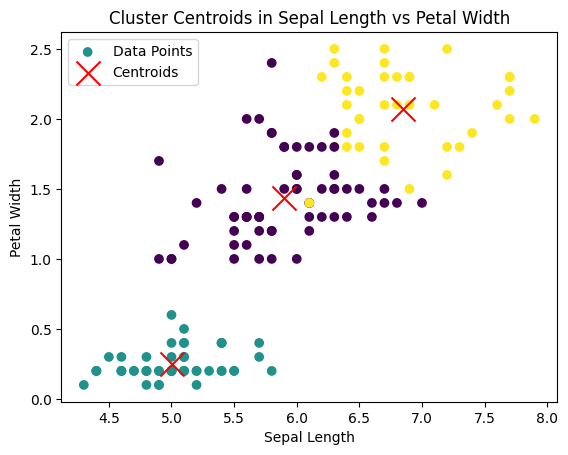

In [21]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

# Step 2: Scatter plot using two features (e.g., Sepal Length and Petal Width)
plt.scatter(df['sepal.length'], df['petal.width'], c=df['Cluster'], cmap='viridis', marker='o', label='Data Points')

# Plot the centroids (adjust based on which features you're plotting)
plt.scatter(centroids[:, 0], centroids[:, 3], s=300, c='red', marker='x', label='Centroids')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Cluster Centroids in Sepal Length vs Petal Width')

# Show the legend and the plot
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


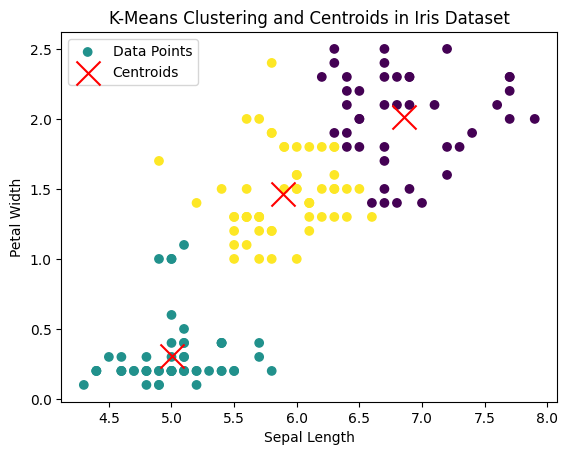

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = df[['sepal.length', 'petal.width']]


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


df['Cluster'] = kmeans.predict(X)


centroids = kmeans.cluster_centers_


plt.scatter(df['sepal.length'], df['petal.width'], c=df['Cluster'], cmap='viridis', marker='o', label='Data Points')


plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')


plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering and Centroids in Iris Dataset')
plt.legend()
plt.show()


In [23]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(f"Sum of Squared Errors (SSE) of the final model: {sse}")

Sum of Squared Errors (SSE) of the final model: 32.73746031746032


In [24]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print(f"Number of iterations required to converge: {iterations}")

Number of iterations required to converge: 8


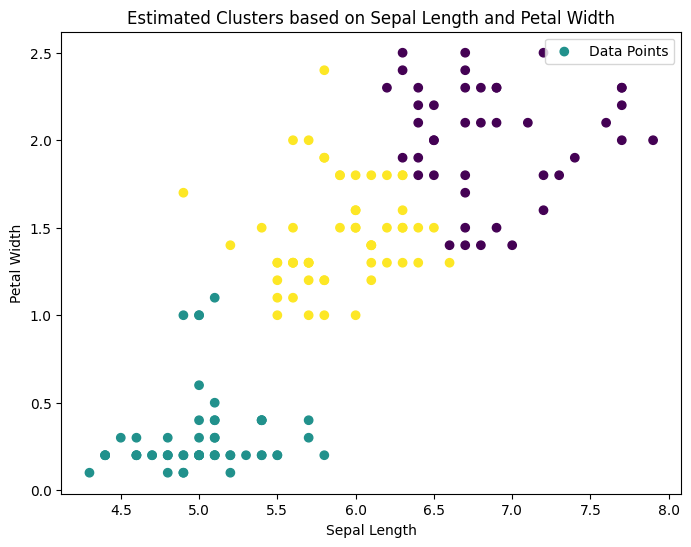

In [25]:

plt.figure(figsize=(8, 6))
plt.scatter(df['sepal.length'], df['petal.width'], c=df['Cluster'], cmap='viridis', marker='o', label='Data Points')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Estimated Clusters based on Sepal Length and Petal Width')


plt.legend()
plt.show()

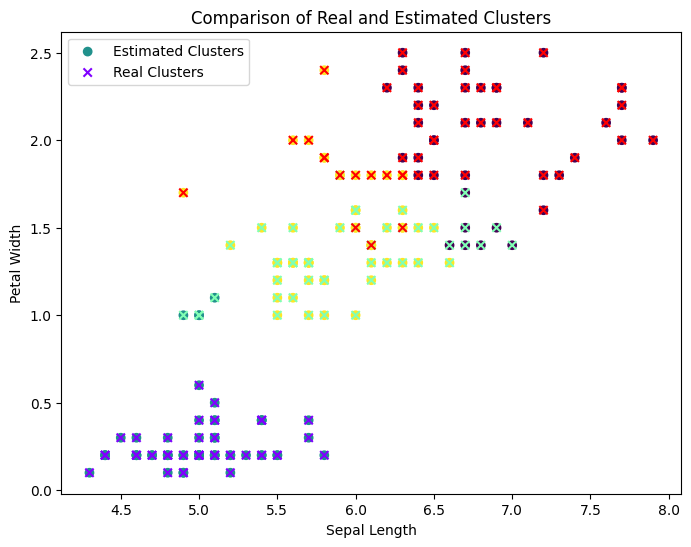

In [28]:

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))


plt.scatter(df['sepal.length'], df['petal.width'], c=df['Cluster'], cmap='viridis', marker='o', label='Estimated Clusters')


plt.scatter(df['sepal.length'], df['petal.width'], c=df['variety'], cmap='rainbow', marker='x', label='Real Clusters')


plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Comparison of Real and Estimated Clusters')

plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

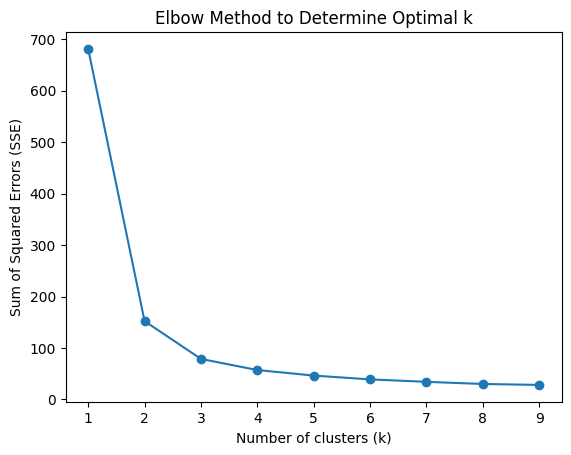

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]


sse_values = []


k_values = range(1, 10)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse_values.append(kmeans.inertia_)


plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


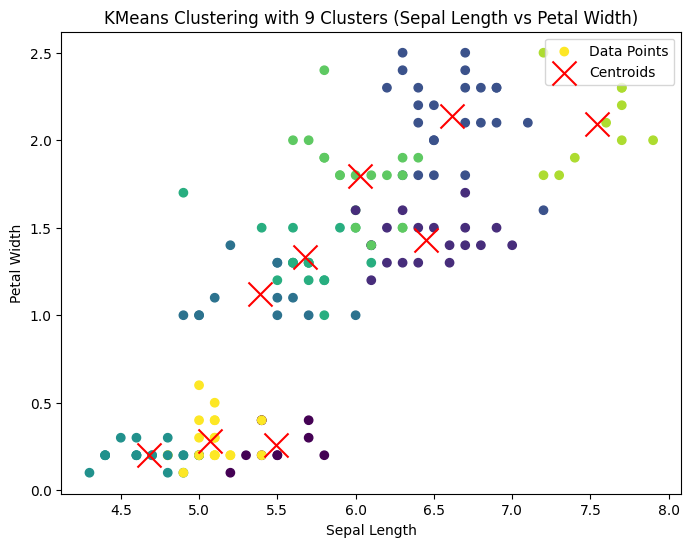

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]


num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


df['Cluster'] = kmeans.predict(X)


centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(df['sepal.length'], df['petal.width'], c=df['Cluster'], cmap='viridis', marker='o', label='Data Points')

plt.scatter(centroids[:, 0], centroids[:, 3], s=300, c='red', marker='x', label='Centroids')


plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering with 9 Clusters (Sepal Length vs Petal Width)')
plt.legend()
plt.show()


In [ ]:
'''
CONCLUSION

Podemos obeservar en el data set de iris que si se puede clasificar de una mejor manera o se ve mejor vista.
En el cartwheel era un poco raro ya que solo habian dos opciones y el cluster seleccionaba en parte de los dos.
Al principio no se me hacia claro esto pero al enternder K Means pues ya se que es parte de.
Me gusta poder aprender de estos tipos de clasificaciones ya que yo he tabajado un poco con CNNs.
Me confundia un poquito al no cambiar los pesos pero ahora que ya vi como funciona, pues creo que es importante
aprender de diferentes tipos de clasificadores.


'''